# Practice Making Plots

## Drills
Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:

Choose one variable and plot that variable four different ways.
Choose two continuous variables, and plot them three different ways.
Choose one continuous variable and one categorical variable, and plot them six different ways.
Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like

Using the University of California, Irvine Absenteeism at Work Data Set.
This is from records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.
https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work


Attribute Information:
1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:
I Certain infectious and parasitic diseases  
II Neoplasms  
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism  
IV Endocrine, nutritional and metabolic diseases  
V Mental and behavioural disorders  
VI Diseases of the nervous system  
VII Diseases of the eye and adnexa  
VIII Diseases of the ear and mastoid process  
IX Diseases of the circulatory system  
X Diseases of the respiratory system  
XI Diseases of the digestive system  
XII Diseases of the skin and subcutaneous tissue  
XIII Diseases of the musculoskeletal system and connective tissue  
XIV Diseases of the genitourinary system  
XV Pregnancy, childbirth and the puerperium  
XVI Certain conditions originating in the perinatal period  
XVII Congenital malformations, deformations and chromosomal abnormalities  
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified  
XIX Injury, poisoning and certain other consequences of external causes  
XX External causes of morbidity and mortality  
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).

3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day 
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
filepath = 'Absenteeism_at_work_AAA/Absenteeism_at_work.csv'
absent = pd.read_csv(filepath, sep=';')
print(absent.head())
print(absent.info())

   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day             ...              Disciplinary failure

In [3]:
print(absent.Age.max())
print(absent.Age.min())

58
27


In [4]:
absent['age_group'] = ['20s' if ((x >= 20) & (x < 30))
                       else '30s' if ((x >= 30) & (x < 40))
                       else '40s' if ((x >= 40) & (x < 50))
                       else '50s' for x in absent['Age']]

# Sort values by age range so following plots occur in order, 20s, 30s, 40s, 50s
absent.sort_values(by='age_group', inplace=True)
print(absent.head())

     ID  Reason for absence  Month of absence  Day of the week  Seasons  \
174  28                  23                 3                4        2   
268  10                   8                 8                3        1   
458  18                  11                 6                3        1   
132  27                  23                 1                5        2   
135  28                  23                 1                3        2   

     Transportation expense  Distance from Residence to Work  Service time  \
174                     225                               26             9   
268                     361                               52             3   
458                     330                               16             4   
132                     184                               42             7   
135                     225                               26             9   

     Age  Work load Average/day     ...      Education  Son  Social drinker  \
1

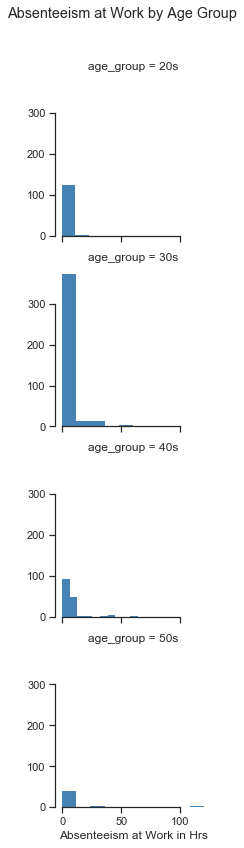

In [5]:
# Set seaborn style
sns.set(style='ticks')

# Tell seaborn about the structure of our data
g = sns.FacetGrid(absent, row='age_group')
g.map(plt.hist, 'Absenteeism time in hours', color='steelblue', lw=0)
# Moving plots apart
plt.subplots_adjust(top=0.9)
g.set_axis_labels('Absenteeism at Work in Hrs')
plt.suptitle('Absenteeism at Work by Age Group')
sns.despine(trim=True)
plt.show()



That graph did not show a lot.  Turns out most employees show up to work. Also, outliers who miss a lot of work make the x-axis large and hard to decipher.

## Boxplots

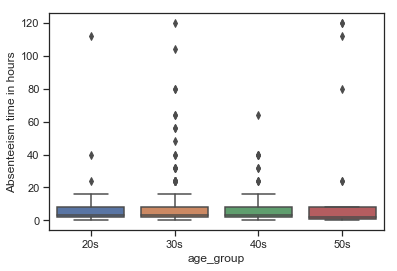

In [6]:
# Try using boxplots
ax = sns.boxplot(x='age_group', y='Absenteeism time in hours', data=absent)
plt.show()

## Bar Plot 

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


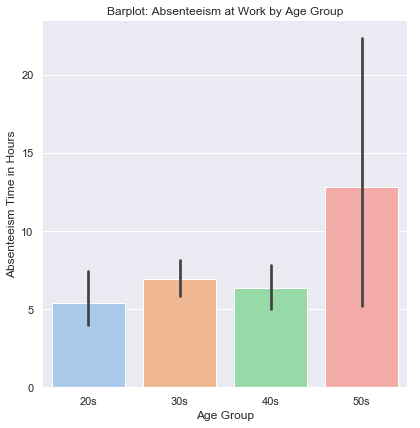

In [7]:
sns.set(style='darkgrid')

g = sns.catplot(x='age_group', y='Absenteeism time in hours', 
                   data=absent, height=6, kind='bar', palette='pastel', ci=95)
g.despine(left=True)
g.set_ylabels('Absenteeism Time in Hours')
g.set_xlabels('Age Group')
plt.title('Barplot: Absenteeism at Work by Age Group')
plt.show()

This plot shows the mean number of hours each group is absent and the error bars. This shows that while people in their 20s were actually likely to be absent for a shorter time frame than those in their 50s on average.

## Pointplot


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


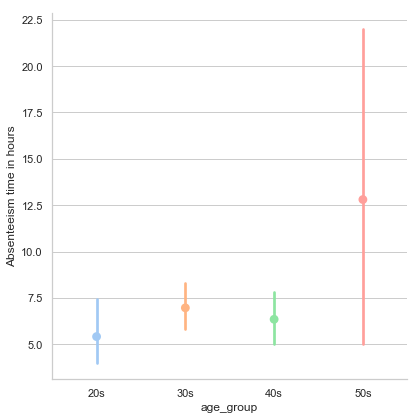

In [8]:
sns.set(style='whitegrid')

g = sns.catplot(x='age_group', y='Absenteeism time in hours', data=absent, 
               height=6, kind='point', palette='pastel', ci=95)

### Violin Plot

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


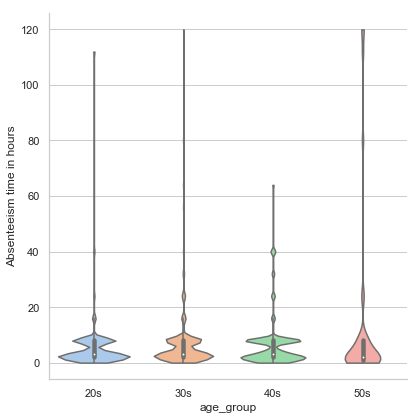

In [9]:
sns.set(style='whitegrid')

# Adjusted bandwidth smaller than default because of negative values
g = sns.catplot(x='age_group', y='Absenteeism time in hours', data=absent, 
               height=6, kind='violin', palette='pastel', bw=.1, cut=0)


The violin plot looks cool, but it has a kernal estimator that doesn't know that negative values are impossible.  I tried to reduce this effect by changing teh bandwidth to 0.1, but this artifact cannot be completely eliminated.  I do like how it is wider at areas with more datapoints, giving a little more insight into the the trends of absenteeism than a boxplot, but the boxplot was better for limiting it to values that can actually exist. I can also try cutting it off at 0.

https://stackoverflow.com/questions/28115637/how-to-better-fit-seaborn-violinplots/28119908#28119908

# Plot 2 Continuous Variables 

### Scatterplot

https://archive.ics.uci.edu/ml/datasets/Wine+Quality
Attribute Information:

For more information, read [Cortez et al., 2009]. 
Input variables (based on physicochemical tests): 
1 - fixed acidity 
2 - volatile acidity 
3 - citric acid 
4 - residual sugar 
5 - chlorides 
6 - free sulfur dioxide 
7 - total sulfur dioxide 
8 - density 
9 - pH 
10 - sulphates 
11 - alcohol 
Output variable (based on sensory data): 
12 - quality (score between 0 and 10) 

Units in screen shot below, from Cortez et al. 2009

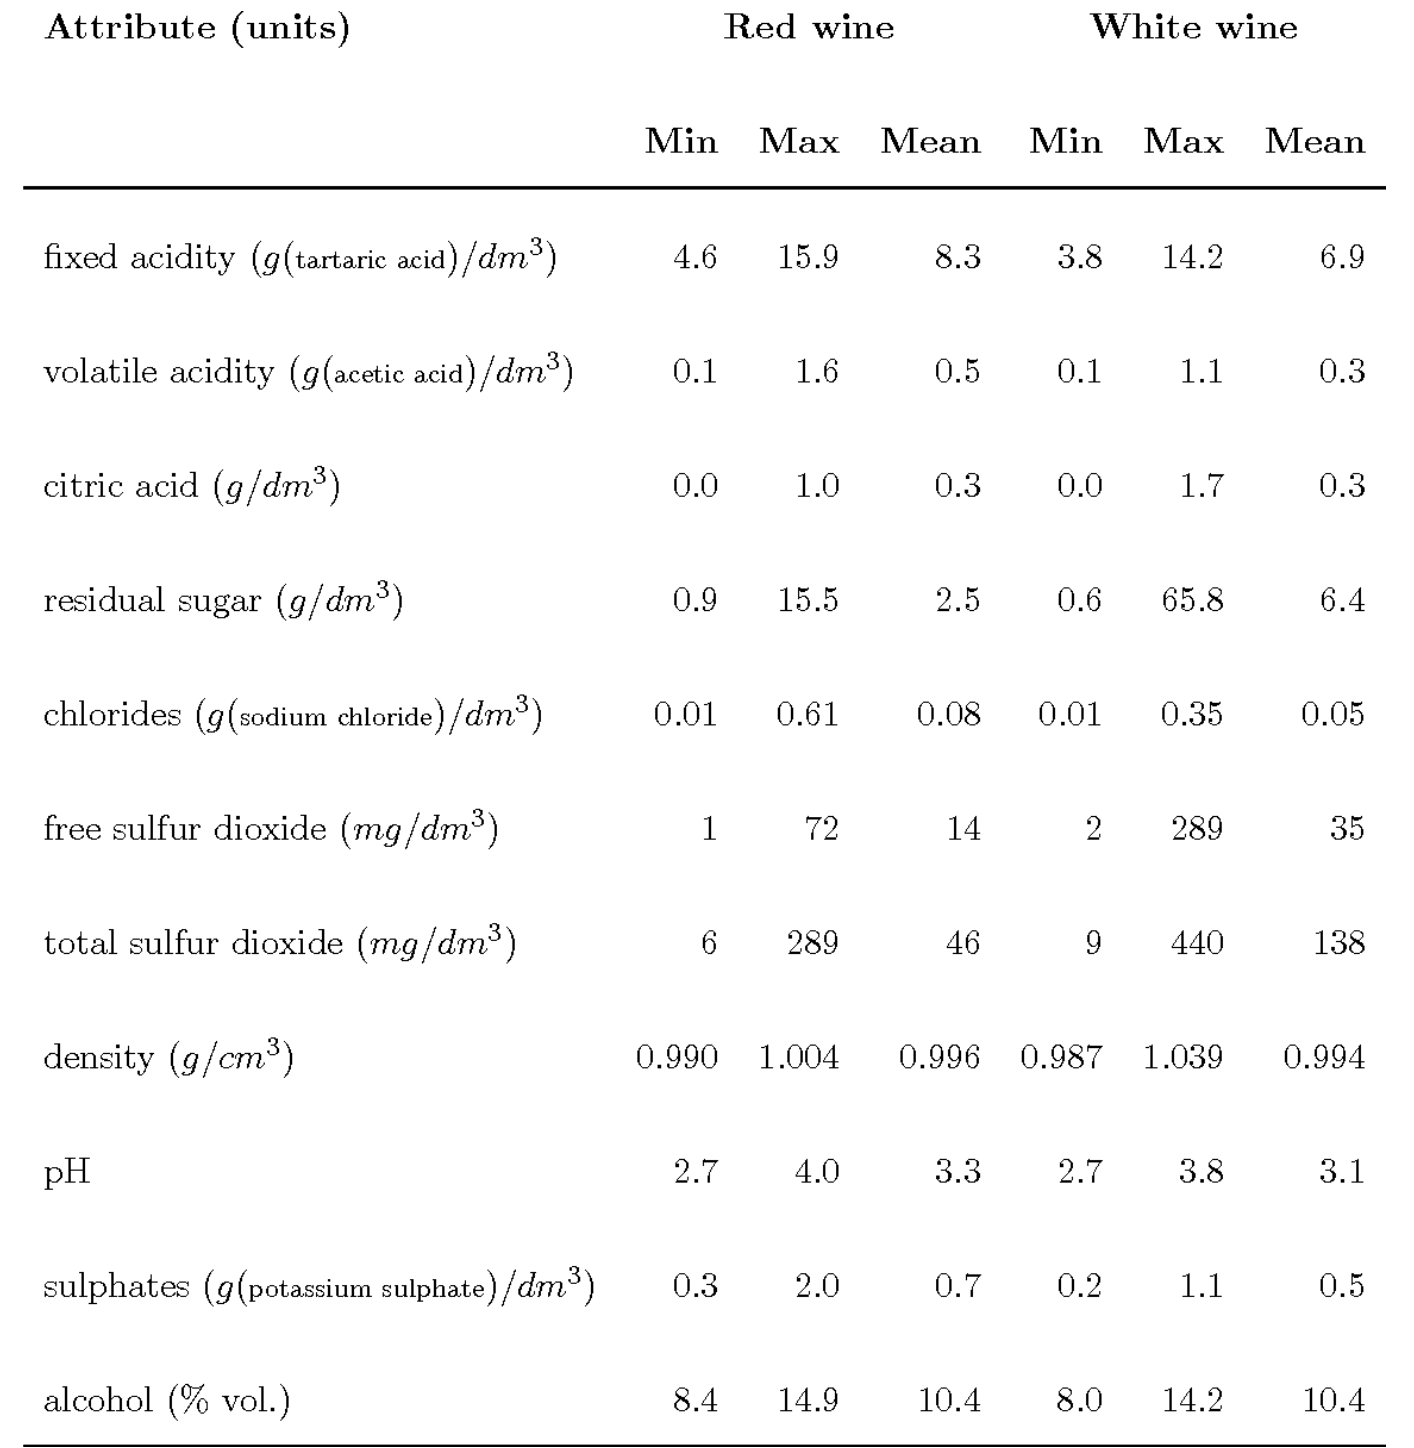

In [10]:
wine_file = 'winequality-white.csv'
wine = pd.read_csv(wine_file, sep=';')
print(wine.head())
print(wine.info())

red_wine = pd.read_csv('winequality-red.csv', sep=';')
print(red_wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

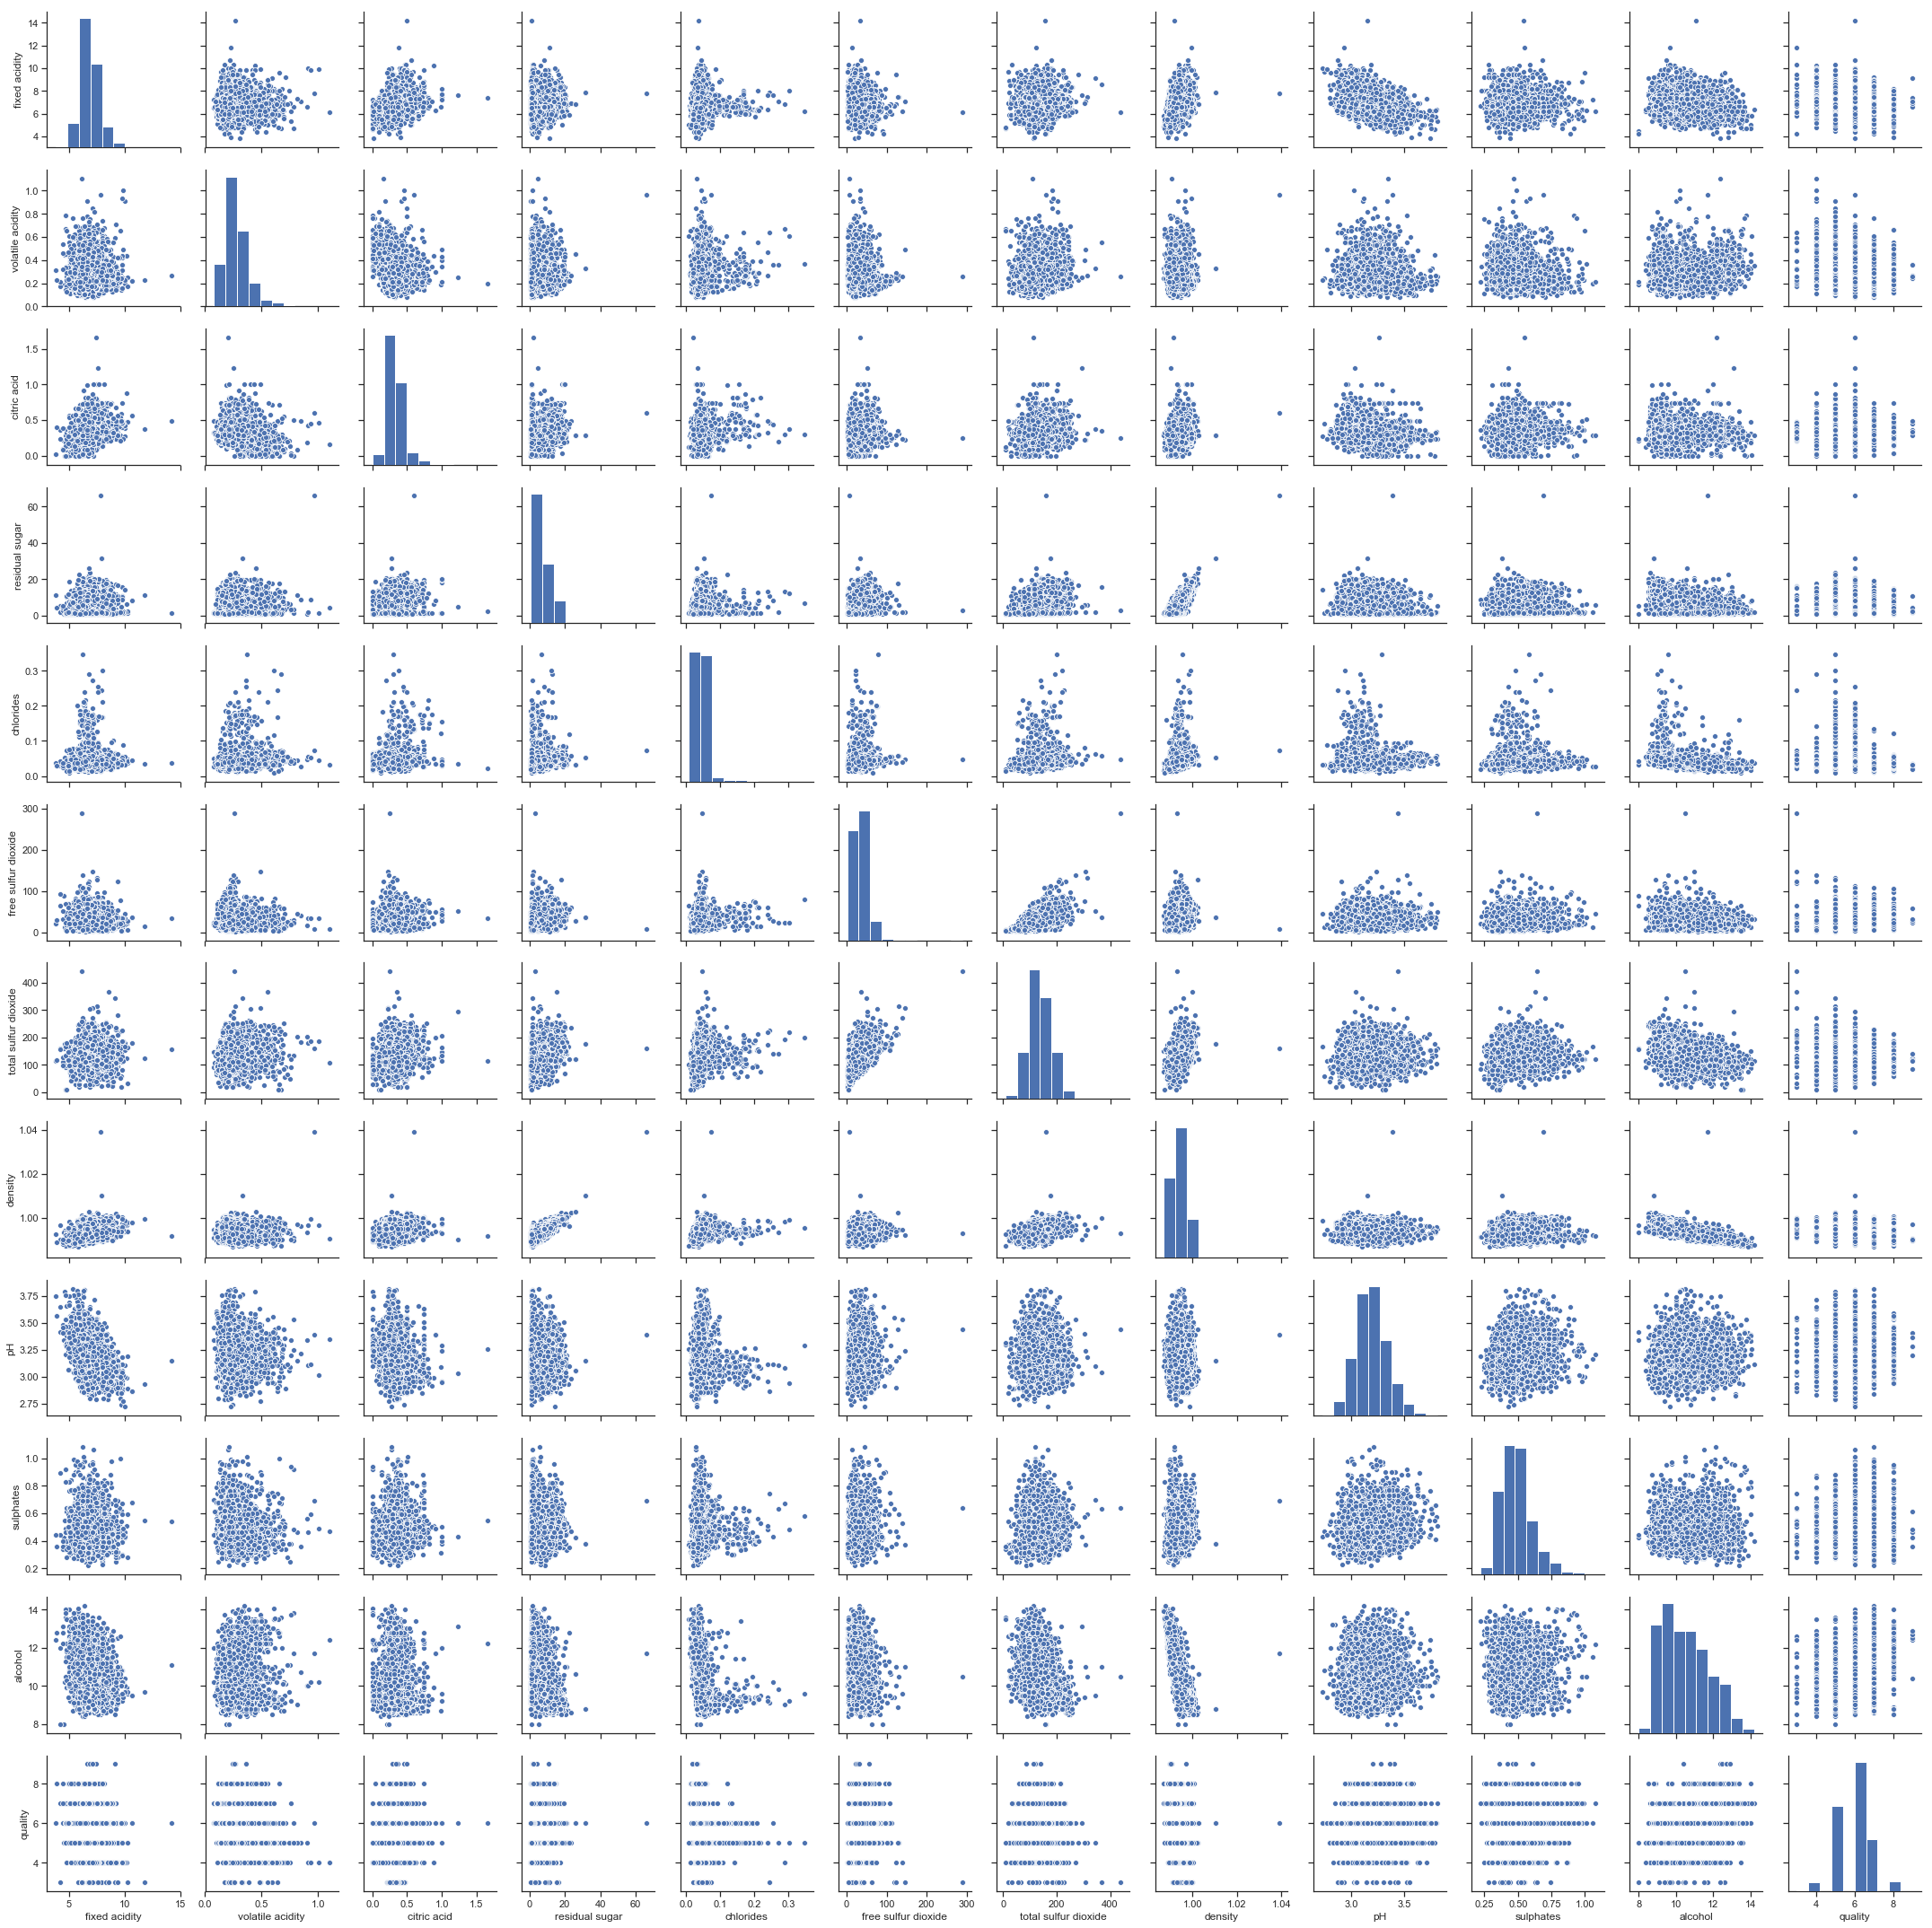

In [11]:
# Looking for which variables might be fun to plot.  Mostly I just like pairplots.
sns.set(style='ticks', color_codes=True)
g = sns.pairplot(wine)
plt.show()

### Scatterplot 

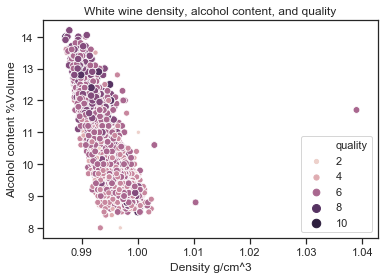

In [12]:
sns.scatterplot(x='density', y='alcohol', data=wine, size='quality', hue='quality')
plt.title('White wine density, alcohol content, and quality')
plt.ylabel('Alcohol content %Volume')
plt.xlabel('Density g/cm^3')
plt.show()

### Scatterplot with fit line

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


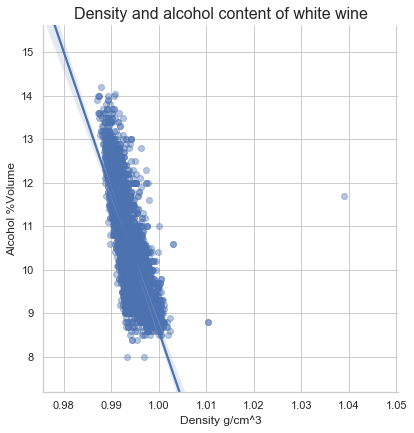

In [13]:
sns.set_style('whitegrid')
g = sns.lmplot(x='density', y='alcohol', data=wine,
              fit_reg=True, scatter_kws={'alpha':0.4}, height=6)

# Adjust y axis to zoom in on relationship a little
ymin = wine['alcohol'].min()*0.9
ymax = wine['alcohol'].max()*1.10
plt.ylim([ymin, ymax])

plt.xlabel('Density g/cm^3')
plt.ylabel('Alcohol %Volume')
plt.title('Density and alcohol content of white wine', fontsize=16)
plt.show()

### KDE Plot
This plot is fun because it shows the most frequent values between alcohol and density.

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


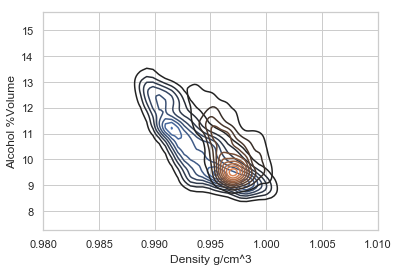

In [14]:
sns.set_style('whitegrid')
x = wine['density']
y = wine['alcohol']

xred = red_wine['density']
yred = red_wine['alcohol']

plt.xlim(0.98, 1.01)

g = sns.kdeplot(x, y)
g = sns.kdeplot(xred, yred)

plt.xlabel('Density g/cm^3')
plt.ylabel('Alcohol %Volume')
plt.show()

### Hexbin plot

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


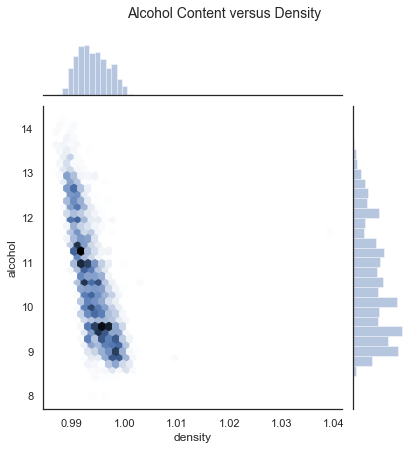

In [15]:
sns.set_style("white")

g = sns.jointplot(x=x, y=y, kind="hex", color="b")
#plt.title('White Wine Alcohol Content vs. Density', loc='center')

# Takes some effort to get title above the graph
fontdict_title = {'fontsize': 14,
                  'verticalalignment': 'bottom',
                  'horizontalalignment':'right',
                  'position': (-.6,1.0)
                 }

plt.title('Alcohol Content versus Density', fontdict=fontdict_title, pad=85)

plt.show()

### Choose one continuous variable and one categorical variable and plot them 6 different ways 

### Swarm plot

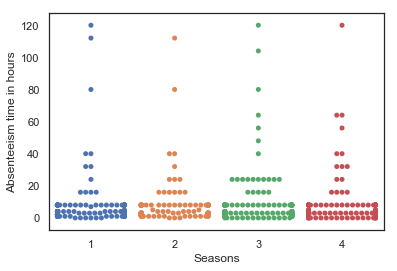

In [16]:
ax = sns.swarmplot(x='Seasons', y='Absenteeism time in hours', data=absent)

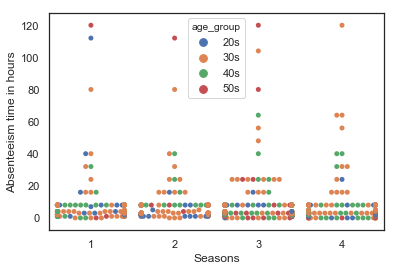

In [17]:
ax = sns.swarmplot(x='Seasons', y='Absenteeism time in hours', hue='age_group', data=absent)

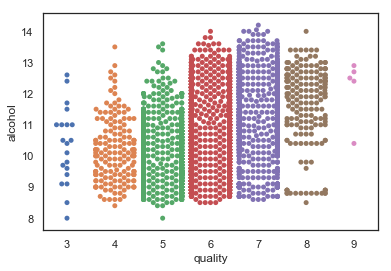

In [18]:
ax = sns.swarmplot(x='quality', y='alcohol', data=wine)

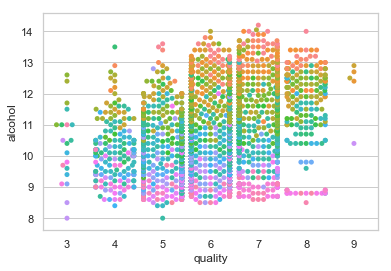

In [38]:
ax = sns.swarmplot(x='quality', y='alcohol', hue='density', data=wine)
ax.legend().set_visible(False)
plt.show()

### Barplot and stripplot together 

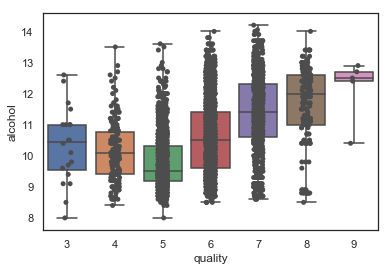

In [20]:
ax = sns.boxplot(x="quality", y="alcohol", data=wine, whis=np.inf)
ax = sns.stripplot(x="quality", y="alcohol", data=wine,
                  jitter=True, color=".3")

### Barplot by itself 

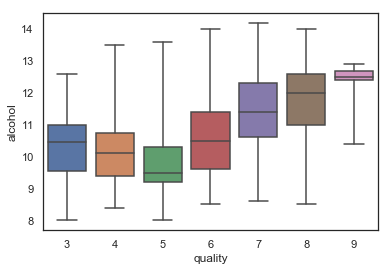

In [21]:
ax = sns.boxplot(x="quality", y="alcohol", data=wine, whis=np.inf)

### Boxenplot 

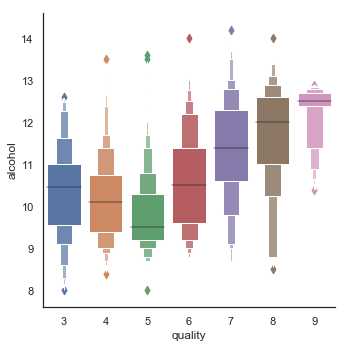

In [22]:
sns.catplot(x="quality", y="alcohol", kind="boxen",
            data=wine)

### Violinplot

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


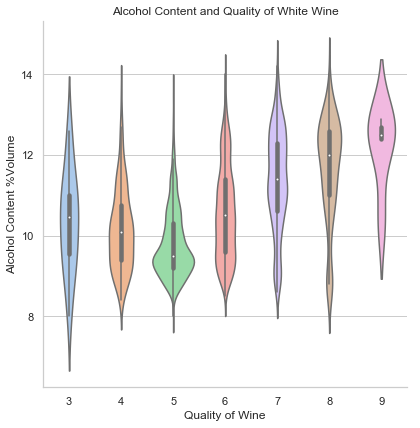

In [34]:
sns.set(style='whitegrid')

# Adjusted bandwidth smaller than default because of negative values
g = sns.catplot(x='quality', y='alcohol', data=wine, 
               height=6, kind='violin', palette='pastel')

plt.title('Alcohol Content and Quality of White Wine')
plt.xlabel('Quality of Wine')
plt.ylabel('Alcohol Content %Volume')
plt.show()

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


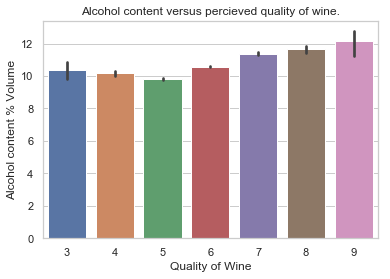

In [56]:
ax = sns.barplot(x="quality", y="alcohol", data=wine)
plt.title('Alcohol content versus percieved quality of wine.')
plt.xlabel('Quality of Wine')
plt.ylabel('Alcohol content % Volume')
plt.show()

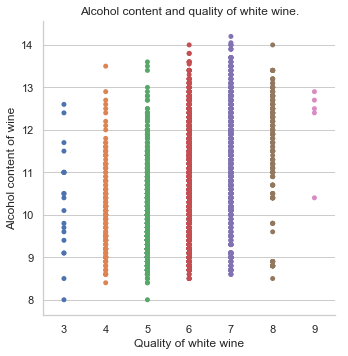

In [32]:
sns.catplot(x="quality", y="alcohol", jitter=False, data=wine);
plt.title('Alcohol content and quality of white wine.')
plt.xlabel('Quality of white wine')
plt.ylabel('Alcohol content of wine')
plt.show()

## Challenge
Challenge
As an optional challenge, find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

Probability distributions
Bivariate relationships
Whether the distributions or the relationships vary across groups
Accompany your plot with a written description of what you see.

When you've completed these exercises, share your results with your mentor.

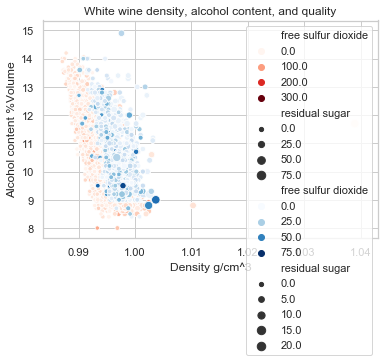

In [47]:
g = sns.scatterplot(x='density', y='alcohol', data=wine, size='residual sugar', hue='free sulfur dioxide', palette='Reds')

g = sns.scatterplot(x='density', y='alcohol', data=red_wine, size='residual sugar', 
                    palette="Blues", hue='free sulfur dioxide')

plt.title('White and Red wine density, alcohol content, and quality')
plt.ylabel('Alcohol content %Volume')
plt.xlabel('Density g/cm^3')

plt.show()